In [1]:
import os
import pandas as pd

from solver import processing
from solver import arima

In [2]:
### FEATURE PARAMETERS
# prediction target
feature_predict = 'P_avg'

### TRAIN/VAL/TEST SPLIT
train_years = [2013, 2014, 2015, 2016]
test_years = [2017]

### FEATURE ENGINEERING PARAMETERS
MA_CONSTANT = 3 # moving average smoothing parameter
N_OUT = 1 # forecast horizon

In [3]:
TURBINE_ID = 'R80711'
DATA_DIR = '../datasets/after_imputation'

# define datasets
data_link = os.path.join(DATA_DIR, 'turbine_{}.csv'.format(TURBINE_ID))
# read datasets
dataset = processing.read_dataset(data_link)

In [4]:
# Smooth with Moving Average
dataset = processing.smooth(
    dataset,
    cols_to_smooth=[feature_predict],
    ma_constant=MA_CONSTANT)

In [5]:
# Split data to train and test
test_dates = dataset.loc[dataset['Date_time'].dt.year.isin(test_years), 'Date_time'].values
train = dataset.loc[dataset['Date_time'].dt.year.isin(train_years), feature_predict].values
test = dataset.loc[dataset['Date_time'].dt.year.isin(test_years), feature_predict].values

In [6]:
# define number of samples to base the first prediction
train = train[-1200:]

# make predictions
y_predict, y_true = arima.make_predictions(train, test, N_OUT)

100%|██████████| 8759/8759 [2:29:44<00:00,  1.03s/it]  


ARIMA: Horizon: 1 	 MAE: 40.04  RMSE: 61.287  sMAPE: 0.373


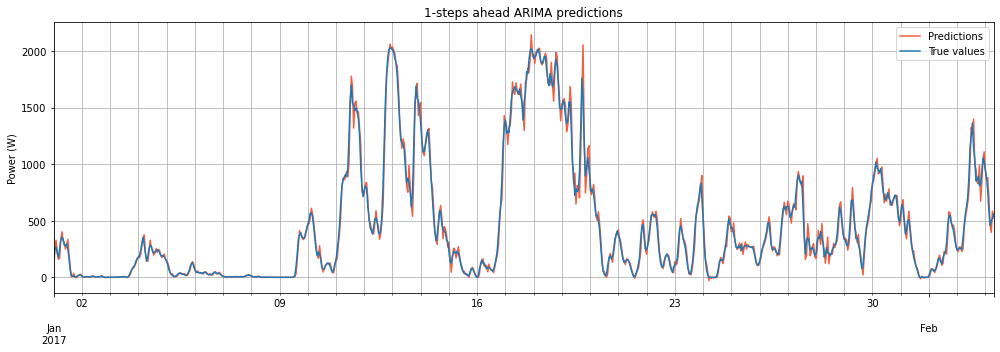

In [8]:
# evaluate predictions
mae, rmse, sm = arima.eval_predictions(y_true, y_predict)
print("ARIMA: Horizon: {} \t MAE: {}  RMSE: {}  sMAPE: {}".format(
    N_OUT, round(mae, 3), round(rmse, 3), round(sm, 3)))


# plot predicitons
predictions = pd.Series(y_predict, index=test_dates[:len(y_predict)])
true = pd.Series(y_true, index=test_dates[:len(y_predict)])
processing.plot_series_predictions(true, predictions, N_OUT, method='ARIMA')